# Initialization

In [3]:
import pandas as pd
import scipy.stats as sst
import scipy
import numpy
import math
%matplotlib inline
from numpy import matrix
numpy.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

EXCEL_LOCATION = "./university data.xlsx"
UBITNAME1 = "suniluma"
PERSON_NUMBER1 = "50249002"
UBITNAME2 = "a45"
PERSON_NUMBER2 = "50244979"
UBITNAME3 ="prajnaga"
PERSON_NUMBER3 = "50244304"

df = pd.read_excel(EXCEL_LOCATION)
df.columns = ["Rank",
              "Name",
              "CS_Score",
              "Research_Overhead",
              "Base_Pay",
              "Tuition_Out_State",
              "GradStudents",
              "TTFaculty",
              "Lecturers",
              "G_TTRatio",
              "G_TTLRatio"]

print("Group members\n")
print("UBITName = {}".format(UBITNAME1))
print("personNumber = {}\n".format(PERSON_NUMBER1))
print("UBITName = {}".format(UBITNAME2))
print("personNumber = {}\n".format(PERSON_NUMBER2))
print("UBITName = {}".format(UBITNAME3))
print("personNumber = {}\n".format(PERSON_NUMBER3))

Group members

UBITName = suniluma
personNumber = 50249002

UBITName = a45
personNumber = 50244979

UBITName = prajnaga
personNumber = 50244304



# Task 1

In [4]:
def mean(df,column):
    return numpy.mean(df[column])

def variance(df,column):
    return numpy.var(df[column])
    
def stddev(df,column):
    return numpy.std(df[column])

In [5]:
mu1 = mean(df,"CS_Score")
mu2 = mean(df,"Research_Overhead")
mu3 = mean(df,"Base_Pay")
mu4 = mean(df,"Tuition_Out_State")
print("mu1 = " + str(mu1))
print("mu2 = " + str(mu2))
print("mu3 = " + str(mu3))
print("mu4 = " + str(mu4))
print("")
var1 = variance(df,"CS_Score")
var2 = variance(df,"Research_Overhead")
var3 = variance(df,"Base_Pay")
var4 = variance(df,"Tuition_Out_State")
print("var1 = " + str(var1))
print("var2 = " + str(var2))
print("var3 = " + str(var3))
print("var4 = " + str(var4))
print("")
sigma1 = stddev(df,"CS_Score")
sigma2 = stddev(df,"Research_Overhead")
sigma3 = stddev(df,"Base_Pay")
sigma4 = stddev(df,"Tuition_Out_State")
print("sigma1 = " + str(sigma1))
print("sigma2 = " + str(sigma2))
print("sigma3 = " + str(sigma3))
print("sigma4 = " + str(sigma4))

mu1 = 3.21428571429
mu2 = 53.3857142857
mu3 = 469178.816327
mu4 = 29711.9591837

var1 = 0.448163265306
var2 = 12.5881632653
var3 = 13900134681.7
var4 = 30727538.733

sigma1 = 0.669449972221
sigma2 = 3.54798016698
sigma3 = 117898.832402
sigma4 = 5543.24261899


# Task 2

In [6]:
def plotter(df, column1, column2):
    return df.plot.scatter(x=column1, y=column2, style='o')

def covariance_matrix(df):
    array_like_variables = df.as_matrix().T
    return numpy.cov(array_like_variables)

def correlation_matrix(df):
    array_like_variables = df.as_matrix().T
    return numpy.corrcoef(array_like_variables)

In [7]:
covarianceMat = matrix(covariance_matrix(df[["CS_Score",
              "Research_Overhead",
              "Base_Pay",
              "Tuition_Out_State",]]))
print("covarianceMat = ")
print(covarianceMat)
print("")
correlationMat = matrix(correlation_matrix(df[["CS_Score",
              "Research_Overhead",
              "Base_Pay",
              "Tuition_Out_State",]]))
print("correlationMat = ")
print(correlationMat)

covarianceMat = 
[[0.458 1.106 3879.782 1058.480]
 [1.106 12.850 70279.376 2805.789]
 [3879.782 70279.376 14189720820.903 -163685641.258]
 [1058.480 2805.789 -163685641.258 31367695.790]]

correlationMat = 
[[1.000 0.456 0.048 0.279]
 [0.456 1.000 0.165 0.140]
 [0.048 0.165 1.000 -0.245]
 [0.279 0.140 -0.245 1.000]]


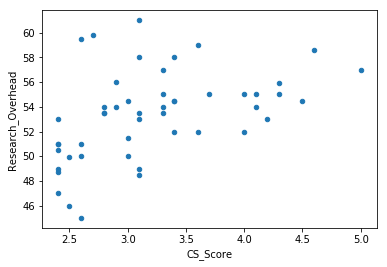

In [8]:
plotter(df,'CS_Score',"Research_Overhead")

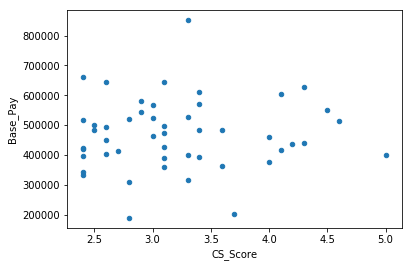

In [9]:
plotter(df,'CS_Score',"Base_Pay")

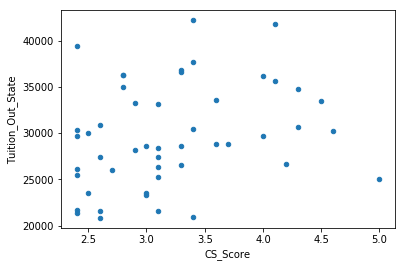

In [10]:
plotter(df,'CS_Score',"Tuition_Out_State")

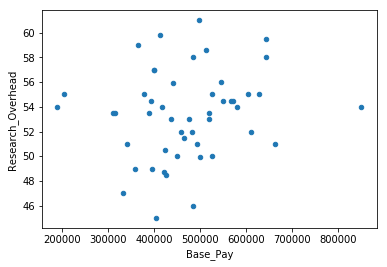

In [11]:
plotter(df,'Base_Pay',"Research_Overhead")

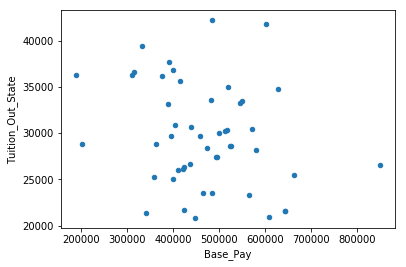

In [12]:
plotter(df,'Base_Pay',"Tuition_Out_State")

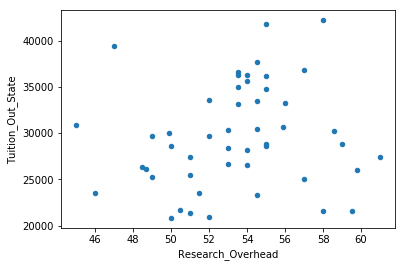

In [13]:
plotter(df,'Research_Overhead',"Tuition_Out_State")

# Task 3

In [14]:
def univariate_pdf(df,column):
    pi = numpy.pi
    sigma = stddev(df,column)
    mu = mean(df,column)
    e = numpy.e
    root2pi = numpy.sqrt(2*pi)
    return [1/(root2pi*sigma)*e**(-1/2.0*((i-mu)/sigma)**2) for i in df[column]]

pdf1 = univariate_pdf(df,"CS_Score")
pdf2 = univariate_pdf(df,"Research_Overhead")
pdf3 = univariate_pdf(df,"Base_Pay")
pdf4 = univariate_pdf(df,"Tuition_Out_State")

pdf_univariate = [pdf1[i]*pdf2[i]*pdf3[i]*pdf4[i] for i in range(49)]
independent_log_likelihood = sum(numpy.log(pdf_univariate))
print("logLikelihood = " + str(independent_log_likelihood))

logLikelihood = -1315.09879256


In [15]:
def multivariate_pdf(df,covarianceMat,no_of_columns):
    inverse_covarianceMat = covarianceMat**-1
    determinant_covarianceMat = numpy.linalg.det(covarianceMat)
    mu = matrix([mu1,mu2,mu3,mu4]).T
    multivariate_list = [matrix(list(df.iloc[i][2:2+no_of_columns])) for i in range(49)]
    
    pdf = []
    for i in range(49):
        x = matrix(multivariate_list[i].tolist()[0]).T
        coefficient = (1/((math.pi*2)**2*math.sqrt(determinant_covarianceMat)))
        pdf.append(math.e**(-1/2.0*((x-mu).T*inverse_covarianceMat*(x-mu)).tolist()[0][0])*coefficient)
    return pdf

multivariate_log_likelihood = sum([numpy.log(i) for i in multivariate_pdf(df,covarianceMat,4)])
print("multivariatelogLikelihood = " + str(multivariate_log_likelihood))

multivariatelogLikelihood = -1304.77824581


In [16]:
BNgraph = [[1,0,0,0],[1,1,0,0],[0,0,1,0],[1,0,0,1]]
print("BNgraph = ")
print(numpy.matrix(BNgraph))

BNgraph = 
[[1 0 0 0]
 [1 1 0 0]
 [0 0 1 0]
 [1 0 0 1]]


In [31]:
def BNlogLikelihood(list1,list2):
    A = numpy.matrix([[len(list1),sum(list1)],[sum(list1),sum([i**2 for i in list1])]]).I
    Y = numpy.matrix([sum(list2),sum([i*j for i,j in zip(list1,list2)])]).T
    [[b0],[b1]] = (A*Y).tolist()
    variance = sum([(b0 + (b1*i) - j)**2 for i,j in zip(list1,list2)])/len(list1)
    return (-1/2.0*len(list1)*numpy.log(2*math.pi*variance) -len(list1)/2.0)
    
def univariate_loglikelihood(pdf1,pdf2):
    pdf_univariate = [pdf1[i]*pdf2[i] for i in range(49)]
    return sum(numpy.log(pdf_univariate))

In [34]:
BNLogLikelihoodFinal = BNlogLikelihood(list(df["CS_Score"]),list(df["Research_Overhead"])) + BNlogLikelihood(list(df["CS_Score"]),list(df["Tuition_Out_State"])) + univariate_loglikelihood(pdf1,pdf3)

In [35]:
print("BNlogLikelihood = {:0.3f}".format(BNLogLikelihoodFinal))

BNlogLikelihood = -1307.396


In [26]:
sum(numpy.log(pdf1))

-49.864344931031198

In [25]:
univariate_loglikelihood(pdf1,)

-181.44487830940128